In [4]:
import pandas
import plotly.express as px
import matplotlib.pyplot as plt

<h1 style="text-align:center">⛏ Data explorations</h1> 

# 1. Prices data from the [Binance API](https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data) 💰

In [5]:
prices = pandas.read_csv('../../datastore/raw/prices.csv')
prices

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,ETHBTC,ETH,BTC,1669395600000,0.072026,0.072222,0.072026,0.072222,1342.1624,1669397399999,96.776126,2657,794.6663,57.298344
1,ETHBTC,ETH,BTC,1669397400000,0.072222,0.072335,0.072117,0.072162,1185.9640,1669399199999,85.640393,2727,560.9044,40.508977
2,ETHBTC,ETH,BTC,1669399200000,0.072163,0.072263,0.072101,0.072189,813.4793,1669400999999,58.717779,1862,359.8931,25.975732
3,ETHBTC,ETH,BTC,1669401000000,0.072188,0.072261,0.072161,0.072212,936.2168,1669402799999,67.599402,1816,470.6928,33.988586
4,ETHBTC,ETH,BTC,1669402800000,0.072223,0.072479,0.072197,0.072375,1115.5725,1669404599999,80.727099,3088,593.4310,42.945939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201477,BUSDRON,BUSD,RON,1670943600000,4.629000,4.630000,4.620000,4.621000,5984.0000,1670945399999,27672.337000,108,2086.0000,9651.160000
1201478,BUSDRON,BUSD,RON,1670945400000,4.620000,4.631000,4.620000,4.630000,3618.0000,1670947199999,16734.982000,42,1642.0000,7593.482000
1201479,BUSDRON,BUSD,RON,1670947200000,4.631000,4.631000,4.630000,4.631000,3254.0000,1670948999999,15069.018000,33,2998.0000,13883.738000
1201480,BUSDRON,BUSD,RON,1670949000000,4.630000,4.631000,4.630000,4.631000,14415.0000,1670950799999,66749.027000,92,7577.0000,35089.087000


## 💎 What is the meaning of each column?
* symbol : mã kí hiệu loại giao dịch
* base : mã đồng cơ sở
* quote : mã đồng báo giá
* Kline open/close time : thời gian mở/đóng của việc thu dữ liệu
* open price : Giá tại thời điểm đầu khi thu dữ liệu
* close price : giá tại thời điểm cuối cùng khi thu dữ liệu
* high price : giá cao nhất trong thời gian thu dữ liệu
* low price : giá thấp nhất trong thời gian thu dữ liệu
* volume : số lượng base đã được trao đổi
* quote asset volume : số lượng quote đã được trao đổi
* taker buy base volume : số lượng mua base (lệnh) (?)
* taker buy quote volume : số lượng mua quote (lệnh) (?)

## 💎 What is the current data type of each column?

In [6]:
prices.dtypes

Symbol                           object
base                             object
quote                            object
Kline open time                   int64
Open price                      float64
High price                      float64
Low price                       float64
Close price                     float64
Volume                          float64
Kline Close time                  int64
Quote asset volume              float64
Number of trades                  int64
Taker buy base asset volume     float64
Taker buy quote asset volume    float64
dtype: object

### ❓ Which columns have missing data

In [7]:
for column in prices.columns:
    print("Missing values in column {}: {} ({}%)".format(column, prices[column].isnull().sum(), prices[column].isnull().sum() / len(prices) * 100))

Missing values in column Symbol: 0 (0.0%)
Missing values in column base: 0 (0.0%)
Missing values in column quote: 0 (0.0%)
Missing values in column Kline open time: 0 (0.0%)
Missing values in column Open price: 0 (0.0%)
Missing values in column High price: 0 (0.0%)
Missing values in column Low price: 0 (0.0%)
Missing values in column Close price: 0 (0.0%)
Missing values in column Volume: 0 (0.0%)
Missing values in column Kline Close time: 0 (0.0%)
Missing values in column Quote asset volume: 0 (0.0%)
Missing values in column Number of trades: 0 (0.0%)
Missing values in column Taker buy base asset volume: 0 (0.0%)
Missing values in column Taker buy quote asset volume: 0 (0.0%)


#### ➡️ Format date column

In [8]:
prices["Kline open time"] = pandas.to_datetime(prices["Kline open time"], unit='ms')
prices["Kline Close time"] = pandas.to_datetime(prices["Kline Close time"], unit='ms')

### ❓ Are there any 2 symbols duplicated (USDTBTC is also a duplicated symbol of BTCUSDT)

#### ➡️ Drop symbols have the same name 

In [9]:
drop_dupl_symbol_df = prices.drop_duplicates(subset='Symbol')
drop_dupl_symbol_df

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,ETHBTC,ETH,BTC,2022-11-25 17:00:00,0.072026,0.072222,0.072026,0.072222,1.342162e+03,2022-11-25 17:29:59.999,9.677613e+01,2657,7.946663e+02,5.729834e+01
865,LTCBTC,LTC,BTC,2022-11-25 17:00:00,0.004513,0.004537,0.004513,0.004523,1.973337e+03,2022-11-25 17:29:59.999,8.928513e+00,718,9.773160e+02,4.422118e+00
1730,BNBBTC,BNB,BTC,2022-11-25 17:00:00,0.018190,0.018290,0.018189,0.018223,1.035607e+03,2022-11-25 17:29:59.999,1.888992e+01,1762,4.612330e+02,8.413329e+00
2595,NEOBTC,NEO,BTC,2022-11-25 17:00:00,0.000415,0.000416,0.000415,0.000416,2.472300e+02,2022-11-25 17:29:59.999,1.027427e-01,33,1.480600e+02,6.153731e-02
3460,QTUMETH,QTUM,ETH,2022-11-25 17:00:00,0.001864,0.001864,0.001864,0.001864,2.600000e+00,2022-11-25 17:29:59.999,4.846400e-03,1,2.600000e+00,4.846400e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200636,HOOKBNB,HOOK,BNB,2022-12-01 14:30:00,0.000338,0.020000,0.000338,0.006934,3.782472e+06,2022-12-01 14:59:59.999,2.634135e+04,32175,1.738188e+06,1.234107e+04
1201218,MAGICBTC,MAGIC,BTC,2022-12-12 08:00:00,0.000022,0.000098,0.000022,0.000053,1.154971e+06,2022-12-12 08:29:59.999,5.548904e+01,5915,4.258004e+05,2.052682e+01
1201285,MAGICBUSD,MAGIC,BUSD,2022-12-12 08:00:00,0.382200,0.924000,0.382200,0.894900,1.520490e+07,2022-12-12 08:29:59.999,1.248077e+07,58295,6.943390e+06,5.707546e+06
1201352,MAGICUSDT,MAGIC,USDT,2022-12-12 08:00:00,0.382100,0.902900,0.382100,0.890000,1.494773e+07,2022-12-12 08:29:59.999,1.218384e+07,38714,8.425779e+06,6.871771e+06


#### ➡️ Finding symbols have the inverse name (BTCUSDT and USDTBTC) => There are no symbols

In [10]:
duplicate_symbol = []

def find_dupl(row):
    matches = drop_dupl_symbol_df.apply(lambda x: x['base'] == row['quote'] and x['quote'] == row['base'], axis=1)
    if matches.any():
        duplicate_symbol.append(row['Symbol'])
    return row
    

drop_dupl_symbol_df.apply(find_dupl, axis=1)

print("Duplicate symbols: ", duplicate_symbol)

Duplicate symbols:  []


## 💎 With each column, how are values distributed?

#### ➡️ Numeric columns


In [11]:
numeric_columns = prices.select_dtypes(include=['float64']).columns
numeric_columns

Index(['Open price', 'High price', 'Low price', 'Close price', 'Volume',
       'Quote asset volume', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

In [12]:
prices.describe()

,Open price,High price,Low price,Close price,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
count,1.201482e+06,1.201482e+06,1.201482e+06,1.201482e+06,1.201482e+06,1.201482e+06,1.201482e+06,1.201482e+06,1.201482e+06
mean,2.106885e+05,2.110754e+05,2.102999e+05,2.106988e+05,8.975141e+07,2.014896e+07,3.253942e+02,4.428797e+07,1.022070e+07
std,7.131791e+06,7.144846e+06,7.118865e+06,7.132188e+06,3.071992e+09,7.477031e+09,3.366229e+03,1.620106e+09,3.735911e+09
min,1.900000e-07,1.900000e-07,1.900000e-07,1.900000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.190000e-04,5.202000e-04,5.176000e-04,5.190000e-04,4.022905e+02,5.184771e-01,9.000000e+00,8.716100e+01,1.063077e-01
50%,9.674900e-02,9.720000e-02,9.632500e-02,9.671000e-02,6.852000e+03,2.061852e+03,3.700000e+01,2.528800e+03,7.053167e+02
75%,1.772000e+00,1.781000e+00,1.764000e+00,1.772000e+00,7.276800e+04,2.149360e+04,1.290000e+02,3.076862e+04,9.536113e+03
max,2.800114e+08,2.952054e+08,2.795345e+08,2.802426e+08,1.087945e+12,4.766742e+12,4.657260e+05,6.547297e+11,2.373518e+12


<AxesSubplot: >

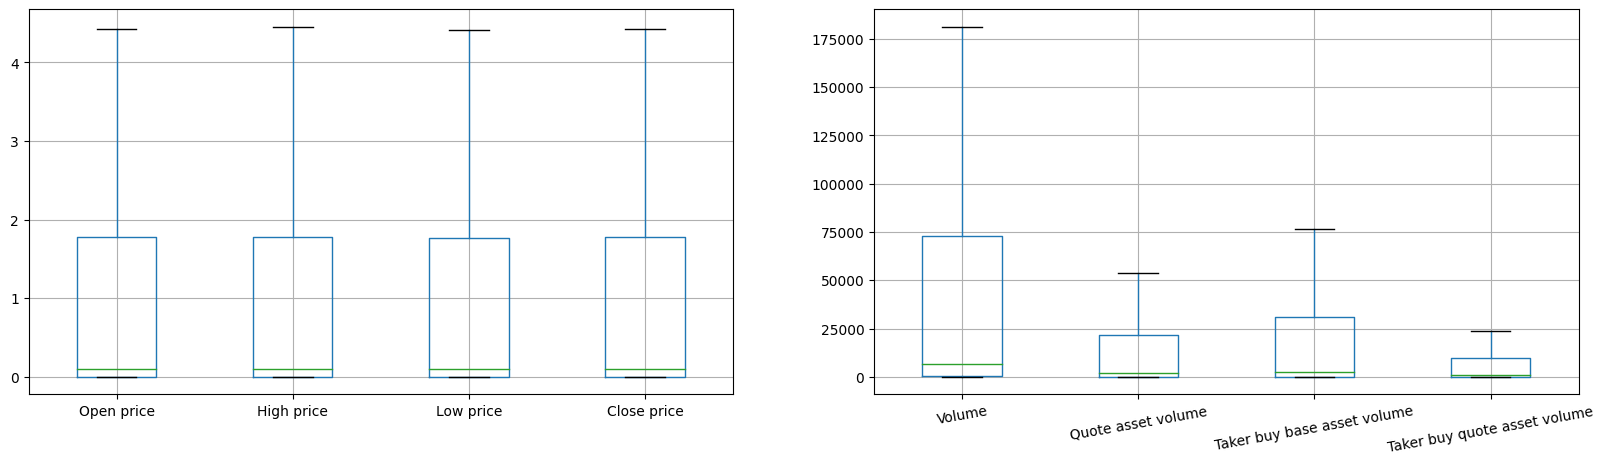

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
prices.boxplot(column=numeric_columns[:4].tolist(), ax=axes[0], showfliers=False)
prices.boxplot(column=numeric_columns[4:].tolist(), ax=axes[1], rot=10, showfliers=False)

📜 Each symbol with have 865 rows of data, each row represents a 1 minute interval and there are totally 1418 symbols

In [14]:
prices.groupby("Symbol").count()[["Kline open time"]]

,Kline open time
Symbol,
1INCHBTC,865
1INCHBUSD,865
1INCHUSDT,865
AAVEBNB,865
AAVEBTC,865
...,...
ZILUSDT,865
ZRXBTC,865
ZRXBUSD,865


#### ➡️ Date columns


In [15]:
date_columns = prices.select_dtypes(include=['datetime64']).columns
date_columns

Index(['Kline open time', 'Kline Close time'], dtype='object')

In [16]:
print("Kline open time: ")
print(prices["Kline open time"].min())
print(prices["Kline open time"].max(), end="\n\n")
print("Kline close time: ")
print(prices["Kline Close time"].min())
print(prices["Kline Close time"].max())

Kline open time: 
2022-11-25 17:00:00
2022-12-13 17:00:00

Kline close time: 
2022-11-25 17:29:59.999000
2022-12-13 17:29:59.999000


In [17]:
prices.to_csv('../../datastore/processed/prices.csv', index=False)

# 2. Symbol data from the [Coin Market Cap API](https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyListingsLatest) 📉

In [18]:
symbols = pandas.read_csv('../../datastore/raw/coin_market_cap_symbols.csv')
symbols

,symbol,price,percent_change_7d,market_cap,tags,date_added
0,BTC,17345.488738,3.649485,3.340239e+11,"mineable,pow,sha-256,store-of-value,state-chan...",2013-04-28T00:00:00.000Z
1,ETH,1339.969038,10.007187,1.639772e+11,"pos,smart-contracts,ethereum-ecosystem,coinbas...",2015-08-07T00:00:00.000Z
2,USDT,0.999933,0.013596,6.626803e+10,"payments,stablecoin,asset-backed-stablecoin,av...",2015-02-25T00:00:00.000Z
3,BNB,281.897026,14.222633,4.509314e+10,"marketplace,centralized-exchange,payments,smar...",2017-07-25T00:00:00.000Z
4,USDC,1.000123,-0.000805,4.401501e+10,"medium-of-exchange,stablecoin,asset-backed-sta...",2018-10-08T00:00:00.000Z
...,...,...,...,...,...,...
4995,MSI,0.000002,86.420187,0.000000e+00,NaN,2022-07-14T13:33:34.000Z
4996,SPILLWAYS,0.002671,-11.459651,0.000000e+00,NaN,2022-12-01T16:44:22.000Z
4997,LUM,0.000748,5.340194,0.000000e+00,"cosmos-ecosystem,injective-ecosystem",2022-01-12T07:49:43.000Z
4998,RPC,0.004652,-20.690687,0.000000e+00,NaN,2022-01-24T02:59:47.000Z


## 💎 What is the meaning of each column?
* symbol: symbol of the coin
* price: price of the symbol by USD
* percent_change_7d: percent change of the price in 7 days
* market_cap: market capitalization of the symbol by USD
* tags: tags of the symbol
* date_added: date added to the coinmarketcap

## 💎 What is the current data type of each column?

In [19]:
symbols.dtypes

symbol                object
price                float64
percent_change_7d    float64
market_cap           float64
tags                  object
date_added            object
dtype: object

### ❓ Which columns have missing data

In [20]:
for column in symbols.columns:
    print("Missing values in column {}: {} ({}%)".format(column, symbols[column].isnull().sum(), symbols[column].isnull().sum() / len(symbols) * 100))

Missing values in column symbol: 0 (0.0%)
Missing values in column price: 0 (0.0%)
Missing values in column percent_change_7d: 0 (0.0%)
Missing values in column market_cap: 0 (0.0%)
Missing values in column tags: 2273 (45.46%)
Missing values in column date_added: 0 (0.0%)


#### ➡️ Filling missing data

In [21]:
symbols["tags"] = symbols["tags"].fillna("no tags")

#### ➡️ Drop 0 values

In [22]:
symbols = symbols.loc[symbols["market_cap"] > 0]

#### ➡️ Format date column

In [23]:
symbols["date_added"] = pandas.to_datetime(symbols["date_added"])

/tmp/ipykernel_41357/954509430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbols["date_added"] = pandas.to_datetime(symbols["date_added"])


In [24]:
symbols.dtypes

symbol                            object
price                            float64
percent_change_7d                float64
market_cap                       float64
tags                              object
date_added           datetime64[ns, UTC]
dtype: object

### ❓ Are there any 2 symbols duplicated

In [25]:
symbols = symbols.drop_duplicates("symbol")
symbols

,symbol,price,percent_change_7d,market_cap,tags,date_added
0,BTC,1.734549e+04,3.649485,3.340239e+11,"mineable,pow,sha-256,store-of-value,state-chan...",2013-04-28 00:00:00+00:00
1,ETH,1.339969e+03,10.007187,1.639772e+11,"pos,smart-contracts,ethereum-ecosystem,coinbas...",2015-08-07 00:00:00+00:00
2,USDT,9.999327e-01,0.013596,6.626803e+10,"payments,stablecoin,asset-backed-stablecoin,av...",2015-02-25 00:00:00+00:00
3,BNB,2.818970e+02,14.222633,4.509314e+10,"marketplace,centralized-exchange,payments,smar...",2017-07-25 00:00:00+00:00
4,USDC,1.000123e+00,-0.000805,4.401501e+10,"medium-of-exchange,stablecoin,asset-backed-sta...",2018-10-08 00:00:00+00:00
...,...,...,...,...,...,...
2584,CPAN,1.462206e-06,48.241615,2.281041e+01,"collectibles-nfts,gaming,entertainment,metaver...",2021-10-17 18:25:33+00:00
2586,NBXC,6.938195e-05,3.649485,1.870182e+01,no tags,2019-08-26 00:00:00+00:00
2587,RNBW,1.544916e-08,-20.869433,8.655974e-02,"petrock-capital-portfolio,spartan-group",2021-06-15 00:00:00+00:00
2588,YFFII,6.407911e-07,70.449146,1.922373e-02,bnb-chain,2020-09-09 00:00:00+00:00


## 💎 With each column, how are values distributed?

#### ➡️ Numeric column

In [26]:
numeric_columns = symbols.select_dtypes(include=['float64']).columns
numeric_columns

Index(['price', 'percent_change_7d', 'market_cap'], dtype='object')

<AxesSubplot: >

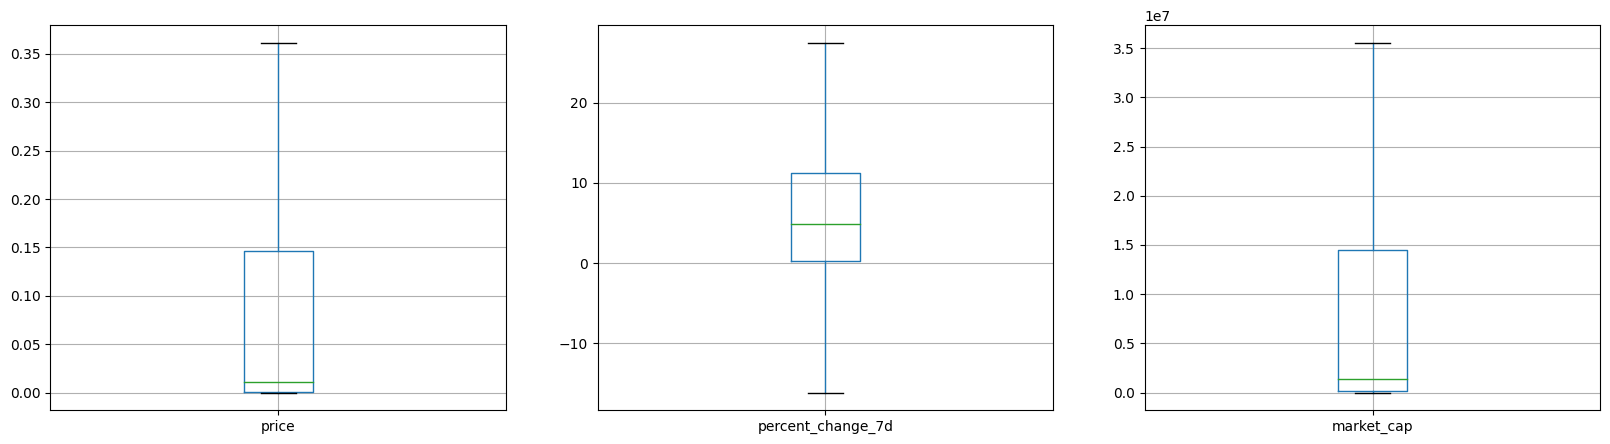

In [27]:
fig2, axes2 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
symbols.boxplot(column=numeric_columns[0], showfliers=False, ax=axes2[0])
symbols.boxplot(column=numeric_columns[1], showfliers=False, ax=axes2[1])
symbols.boxplot(column=numeric_columns[2], showfliers=False, ax=axes2[2])

#### ➡️ Date column

In [28]:
print("Date added: ")
print(symbols["date_added"].min())
print(symbols["date_added"].max())

Date added: 
2013-04-28 00:00:00+00:00
2022-12-15 14:48:21+00:00


#### ➡️ Category column

In [29]:
category_columns = symbols.select_dtypes(include=['object']).columns
category_columns

Index(['symbol', 'tags'], dtype='object')

In [30]:
symbols_cp = symbols.copy()
symbols_cp["tags"] = symbols_cp["tags"].apply(lambda x: str(x).split(","))
symbols_with_tags_df = symbols_cp.explode("tags")
symbols_with_tags_df[["symbol","tags"]]

,symbol,tags
0,BTC,mineable
0,BTC,pow
0,BTC,sha-256
0,BTC,store-of-value
0,BTC,state-channel
...,...,...
2586,NBXC,no tags
2587,RNBW,petrock-capital-portfolio
2587,RNBW,spartan-group
2588,YFFII,bnb-chain


In [31]:
grouped_tags = symbols_with_tags_df.groupby("tags").count()[["symbol"]]
grouped_tags.describe()

,symbol
count,280.000000
mean,27.553571
std,57.882194
min,1.000000
25%,3.000000
50%,9.500000
75%,30.000000
max,576.000000


### ❓ Which symbols are priced close to USD and are reliable to store coins on the wallet

In [32]:
stable_coin_df = symbols.loc[(symbols['percent_change_7d'].abs() < 0.1) & ((symbols['price'].astype(float) - 1).abs() < 0.01)]
stable_coin_df

,symbol,price,percent_change_7d,market_cap,tags,date_added
2,USDT,0.999933,0.013596,6.626803e+10,"payments,stablecoin,asset-backed-stablecoin,av...",2015-02-25 00:00:00+00:00
4,USDC,1.000123,-0.000805,4.401501e+10,"medium-of-exchange,stablecoin,asset-backed-sta...",2018-10-08 00:00:00+00:00
6,BUSD,1.000377,-0.044206,1.630954e+10,"stablecoin,asset-backed-stablecoin,binance-cha...",2019-09-20 00:00:00+00:00
13,DAI,0.999941,-0.001724,5.801356e+09,"defi,stablecoin,asset-backed-stablecoin,ethere...",2019-11-22 00:00:00+00:00
43,USDP,0.998570,-0.090844,8.768281e+08,"store-of-value,stablecoin,asset-backed-stablec...",2018-09-27 00:00:00+00:00
46,TUSD,0.999939,-0.058423,8.462717e+08,"store-of-value,stablecoin,asset-backed-stablec...",2018-03-06 00:00:00+00:00
73,FEI,0.999136,-0.020157,4.246290e+08,"defi,stablecoin,algorithmic-stablecoin",2021-03-02 00:00:00+00:00
219,EDGT,1.000454,0.021922,2.100953e+08,no tags,2021-04-27 00:00:00+00:00
346,OUSD,0.997583,0.030620,4.713713e+07,"defi,stablecoin,usd-stablecoin",2020-09-27 00:00:00+00:00
373,MUSD,0.994568,0.000000,4.086279e+07,"defi,stablecoin,asset-backed-stablecoin,polygo...",2020-06-28 00:00:00+00:00


In [33]:
symbols.to_csv('../../datastore/processed/coin_market_cap_symbols.csv', index=False)